In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [11]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset")
#ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
#ap.add_argument("-m", "--model", type=str,
	default="mask_detector.model",
	help="path to output face mask detector model")
#args = vars(ap.parse_args()) 

IndentationError: unexpected indent (680128847.py, line 4)

In [12]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [13]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images('C:/Users/HEWLLET/PycharmProjects/Homework/train'))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [14]:
imagePaths

['C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\0.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\1.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\10.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\100.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\101.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\102.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\104.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\105.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\106.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\107.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\108.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\109.jpg',
 'C:/Users/HEWLLET/PycharmProjects/Homework/train\\without_mask\\11.jpg',
 'C:/Users/HEWLLET/PycharmProje

In [15]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [16]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [19]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, labels[500:], dtype=float32)

NameError: name 'float32' is not defined

In [20]:
X_train, X_test, y_train, y_test = train_test_split( data, labels, test_size=0.33, random_state=42)

In [23]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

9406464/9406464 [==============================] - 4s 0us/step


In [21]:
X_train

array([[[[-0.6862745 , -0.5921569 , -0.6862745 ],
         [-1.        , -0.9607843 , -1.        ],
         [-0.78039217, -0.6784314 , -0.73333335],
         ...,
         [-0.78039217, -0.7647059 , -0.8509804 ],
         [-0.64705884, -0.64705884, -0.70980394],
         [-0.46666664, -0.49019605, -0.5294118 ]],

        [[-0.7882353 , -0.73333335, -0.79607844],
         [-0.92156863, -0.84313726, -0.90588236],
         [-0.84313726, -0.77254903, -0.8117647 ],
         ...,
         [-0.5294118 , -0.52156866, -0.58431375],
         [-0.5294118 , -0.5372549 , -0.5686275 ],
         [-0.4823529 , -0.49019605, -0.52156866]],

        [[-0.6862745 , -0.6784314 , -0.7254902 ],
         [-0.9372549 , -0.92941177, -0.96862745],
         [-0.88235295, -0.88235295, -0.8980392 ],
         ...,
         [-0.75686276, -0.7490196 , -0.79607844],
         [-0.6       , -0.6       , -0.6       ],
         [-0.7490196 , -0.7490196 , -0.7490196 ]],

        ...,

        [[-0.67058825, -0.78039217, -1

In [22]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [30]:
# compile our model
print("[INFO] compiling model...")
epochs = 20
learning_rate = 0.01
decay_rate = learning_rate / epochs
opt = Adam(lr=learning_rate, decay=decay_rate)#Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...


C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
34/34 [==============================] - 70s 2s/step - loss: 0.5391 - accuracy: 0.9326 - val_loss: 0.0878 - val_accuracy: 0.9674
Epoch 2/20
34/34 [==============================] - 49s 1s/step - loss: 0.0294 - accuracy: 0.9934 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/20
34/34 [==============================] - 49s 1s/step - loss: 0.0376 - accuracy: 0.9897 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/20
34/34 [==============================] - 50s 1s/step - loss: 0.0064 - accuracy: 0.9972 - val_loss: 0.0135 - val_accuracy: 0.9928
Epoch 5/20
34/34 [==============================] - 48s 1s/step - loss: 0.0076 - accuracy: 0.9963 - val_loss: 0.0206 - val_accuracy: 0.9891
Epoch 6/20
34/34 [==============================] - 48s 1s/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/20
34/34 [==============================] - 50s 1s/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 8/20
34/34 [==

In [29]:
from tensorflow.keras.optimizers.legacy import Adam

In [31]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save('16_model', save_format="h5")

[INFO] evaluating network...
9/9 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       138
without_mask       1.00      0.99      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

[INFO] saving mask detector model...


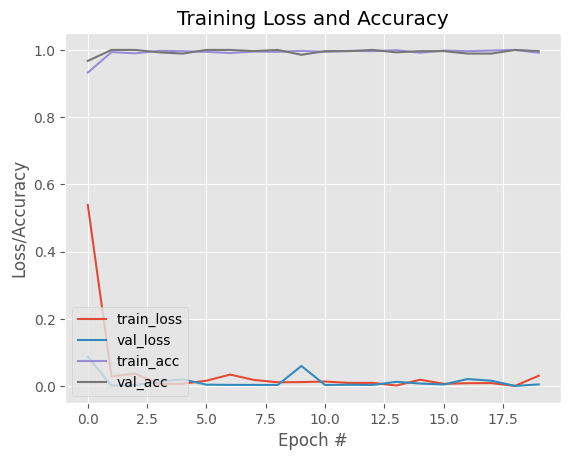

In [32]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('foo.pdf')

In [33]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

In [ ]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
#prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
#weightsPath = os.path.sep.join([args["face"],
	"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model('16_model')